In [1]:
from sea_breeze import sea_breeze_filters, load_model_data, sea_breeze_funcs, utils
from dask.distributed import Client
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
client = Client()
client

/g/data/xp65/public/apps/med_conda/envs/analysis3-24.07/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35693 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/35693/status,
Dashboard: /proxy/35693/status,Workers: 7
Total threads: 7,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39169,Workers: 7
Dashboard: /proxy/35693/status,Total threads: 7
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:42453,Total threads: 1
Dashboard: /proxy/43485/status,Memory: 4.57 GiB
Nanny: tcp://127.0.0.1:42741,


In [3]:
lat_slice, lon_slice = utils.get_aus_bounds()
t1 = "2016-01-01 00:00"
t2 = "2016-01-31 23:00"

uas = load_model_data.load_barra_variable(
    "uas",
    t1,
    t2,
    "AUST-04",
    "1hr",
    lat_slice,
    lon_slice,
    chunks={"time":-1,"lat":{},"lon":{}})
vas = load_model_data.load_barra_variable(
    "vas",
    t1,
    t2,
    "AUST-04",
    "1hr",
    lat_slice,
    lon_slice,
    chunks={"time":-1,"lat":{},"lon":{}})
angle_ds = load_model_data.get_coastline_angle_kernel(
    compute=False,
    path_to_load="/g/data/ng72/ab4502/coastline_data/barra_c.nc",
    lat_slice=lat_slice,
    lon_slice=lon_slice)
uprime, vprime = sea_breeze_funcs.rotate_wind(uas,vas,angle_ds.angle_interp)

In [4]:
vprime_rolling = vprime.rolling(dim={"time":24},min_periods=12,center=True).mean().chunk({
    "lat":vprime.chunksizes["lat"][0],
    "lon":vprime.chunksizes["lon"][0]})

In [5]:
vprime_pert = vprime - vprime_rolling

In [ ]:
hourly_pert = vprime_pert.groupby("time.hour").mean().compute()

/g/data/xp65/public/apps/med_conda/envs/analysis3-24.07/lib/python3.11/site-packages/distributed/client.py:3371: UserWarning: Sending large graph of size 20.96 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Text(0.5, 1.0, '0 UTC')

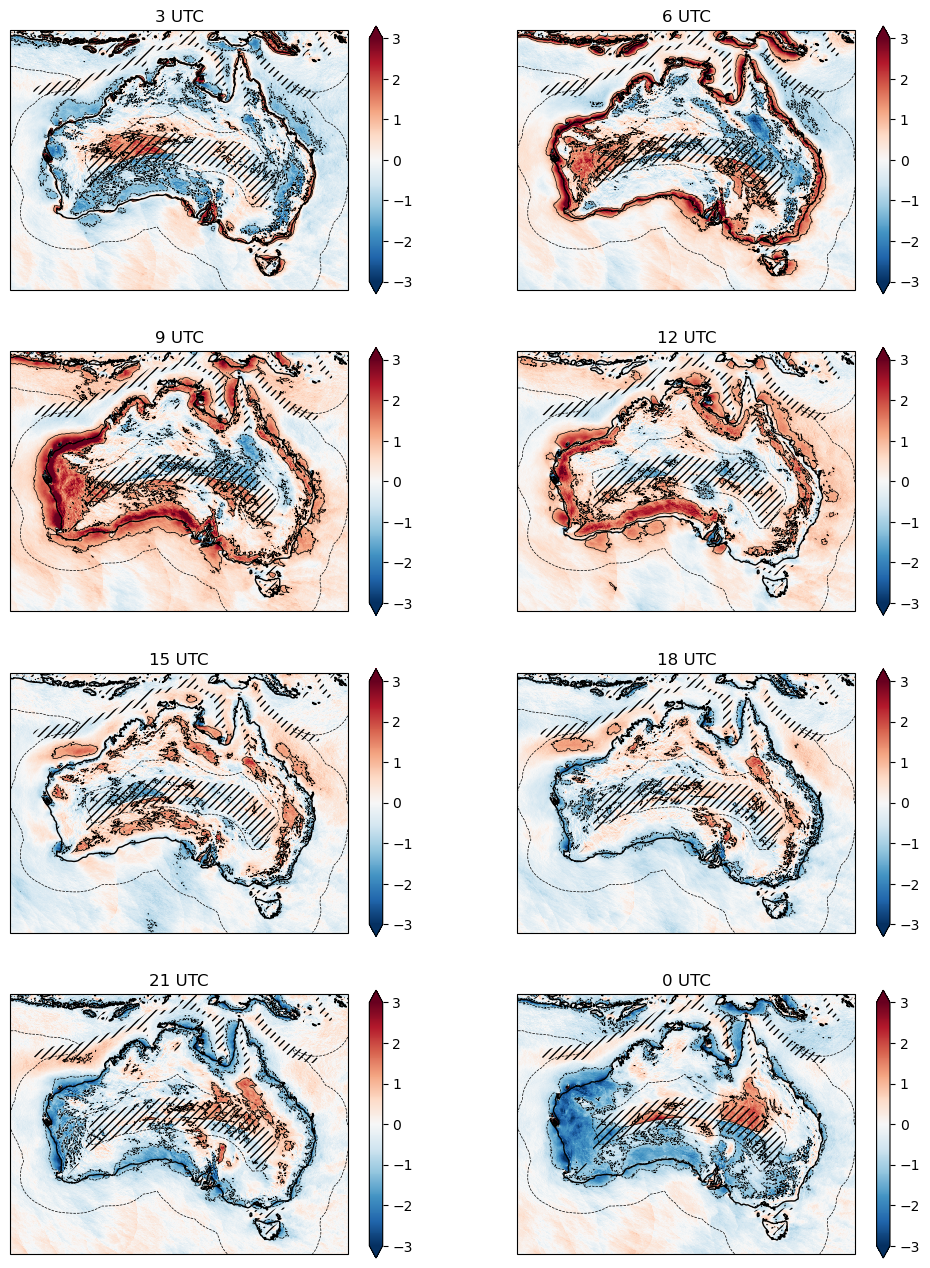

In [104]:
vmin=-3
vmax=3

plt.figure(figsize=[12,16])
ax=plt.subplot(4,2,1,projection=ccrs.PlateCarree())
hourly_pert.sel(hour=3).plot(vmin=vmin,vmax=vmax,cmap="RdBu_r")
xr.plot.contour(hourly_pert.sel(hour=3),levels=[-1,1],colors="k",linewidths=0.5)
xr.plot.contour(angle_ds.min_coast_dist,levels=[500],colors="k",linewidths=0.5,linestyles=["--"])
ax.coastlines()
xr.plot.contourf(angle_ds.variance_interp,levels=[0.,0.5],hatches=["","////"],colors="none",add_colorbar=False)
plt.title("3 UTC")

ax=plt.subplot(4,2,2,projection=ccrs.PlateCarree())
hourly_pert.sel(hour=6).plot(vmin=vmin,vmax=vmax,cmap="RdBu_r")
xr.plot.contour(hourly_pert.sel(hour=6),levels=[-1,1],colors="k",linewidths=0.5)
xr.plot.contour(angle_ds.min_coast_dist,levels=[500],colors="k",linewidths=0.5,linestyles=["--"])
ax.coastlines()
xr.plot.contourf(angle_ds.variance_interp,levels=[0.,0.5],hatches=["","////"],colors="none",add_colorbar=False)
plt.title("6 UTC")

ax=plt.subplot(4,2,3,projection=ccrs.PlateCarree())
hourly_pert.sel(hour=9).plot(vmin=vmin,vmax=vmax,cmap="RdBu_r")
xr.plot.contour(hourly_pert.sel(hour=9),levels=[-1,1],colors="k",linewidths=0.5)
xr.plot.contour(angle_ds.min_coast_dist,levels=[500],colors="k",linewidths=0.5,linestyles=["--"])
ax.coastlines()
xr.plot.contourf(angle_ds.variance_interp,levels=[0.,0.5],hatches=["","////"],colors="none",add_colorbar=False)
plt.title("9 UTC")

ax=plt.subplot(4,2,4,projection=ccrs.PlateCarree())
hourly_pert.sel(hour=12).plot(vmin=vmin,vmax=vmax,cmap="RdBu_r")
xr.plot.contour(hourly_pert.sel(hour=12),levels=[-1,1],colors="k",linewidths=0.5)
xr.plot.contour(angle_ds.min_coast_dist,levels=[500],colors="k",linewidths=0.5,linestyles=["--"])
ax.coastlines()
xr.plot.contourf(angle_ds.variance_interp,levels=[0.,0.5],hatches=["","////"],colors="none",add_colorbar=False)
plt.title("12 UTC")

ax=plt.subplot(4,2,5,projection=ccrs.PlateCarree())
hourly_pert.sel(hour=15).plot(vmin=vmin,vmax=vmax,cmap="RdBu_r")
xr.plot.contour(hourly_pert.sel(hour=15),levels=[-1,1],colors="k",linewidths=0.5)
xr.plot.contour(angle_ds.min_coast_dist,levels=[500],colors="k",linewidths=0.5,linestyles=["--"])
ax.coastlines()
xr.plot.contourf(angle_ds.variance_interp,levels=[0.,0.5],hatches=["","////"],colors="none",add_colorbar=False)
plt.title("15 UTC")

ax=plt.subplot(4,2,6,projection=ccrs.PlateCarree())
hourly_pert.sel(hour=18).plot(vmin=vmin,vmax=vmax,cmap="RdBu_r")
xr.plot.contour(hourly_pert.sel(hour=18),levels=[-1,1],colors="k",linewidths=0.5)
xr.plot.contour(angle_ds.min_coast_dist,levels=[500],colors="k",linewidths=0.5,linestyles=["--"])
ax.coastlines()
xr.plot.contourf(angle_ds.variance_interp,levels=[0.,0.5],hatches=["","////"],colors="none",add_colorbar=False)
plt.title("18 UTC")

ax=plt.subplot(4,2,7,projection=ccrs.PlateCarree())
hourly_pert.sel(hour=21).plot(vmin=vmin,vmax=vmax,cmap="RdBu_r")
xr.plot.contour(hourly_pert.sel(hour=21),levels=[-1,1],colors="k",linewidths=0.5)
xr.plot.contour(angle_ds.min_coast_dist,levels=[500],colors="k",linewidths=0.5,linestyles=["--"])
ax.coastlines()
xr.plot.contourf(angle_ds.variance_interp,levels=[0.,0.5],hatches=["","////"],colors="none",add_colorbar=False)
plt.title("21 UTC")

ax=plt.subplot(4,2,8,projection=ccrs.PlateCarree())
hourly_pert.sel(hour=0).plot(vmin=vmin,vmax=vmax,cmap="RdBu_r")
xr.plot.contour(hourly_pert.sel(hour=0),levels=[-1,1],colors="k",linewidths=0.5)
xr.plot.contour(angle_ds.min_coast_dist,levels=[500],colors="k",linewidths=0.5,linestyles=["--"])
ax.coastlines()
xr.plot.contourf(angle_ds.variance_interp,levels=[0.,0.5],hatches=["","////"],colors="none",add_colorbar=False)
plt.title("0 UTC")

In [55]:
_,lsm = load_model_data.load_barra_static("AUST-04",lon_slice,lat_slice)

In [56]:
min_coast_dist = xr.where(lsm,angle_ds.min_coast_dist,-angle_ds.min_coast_dist)

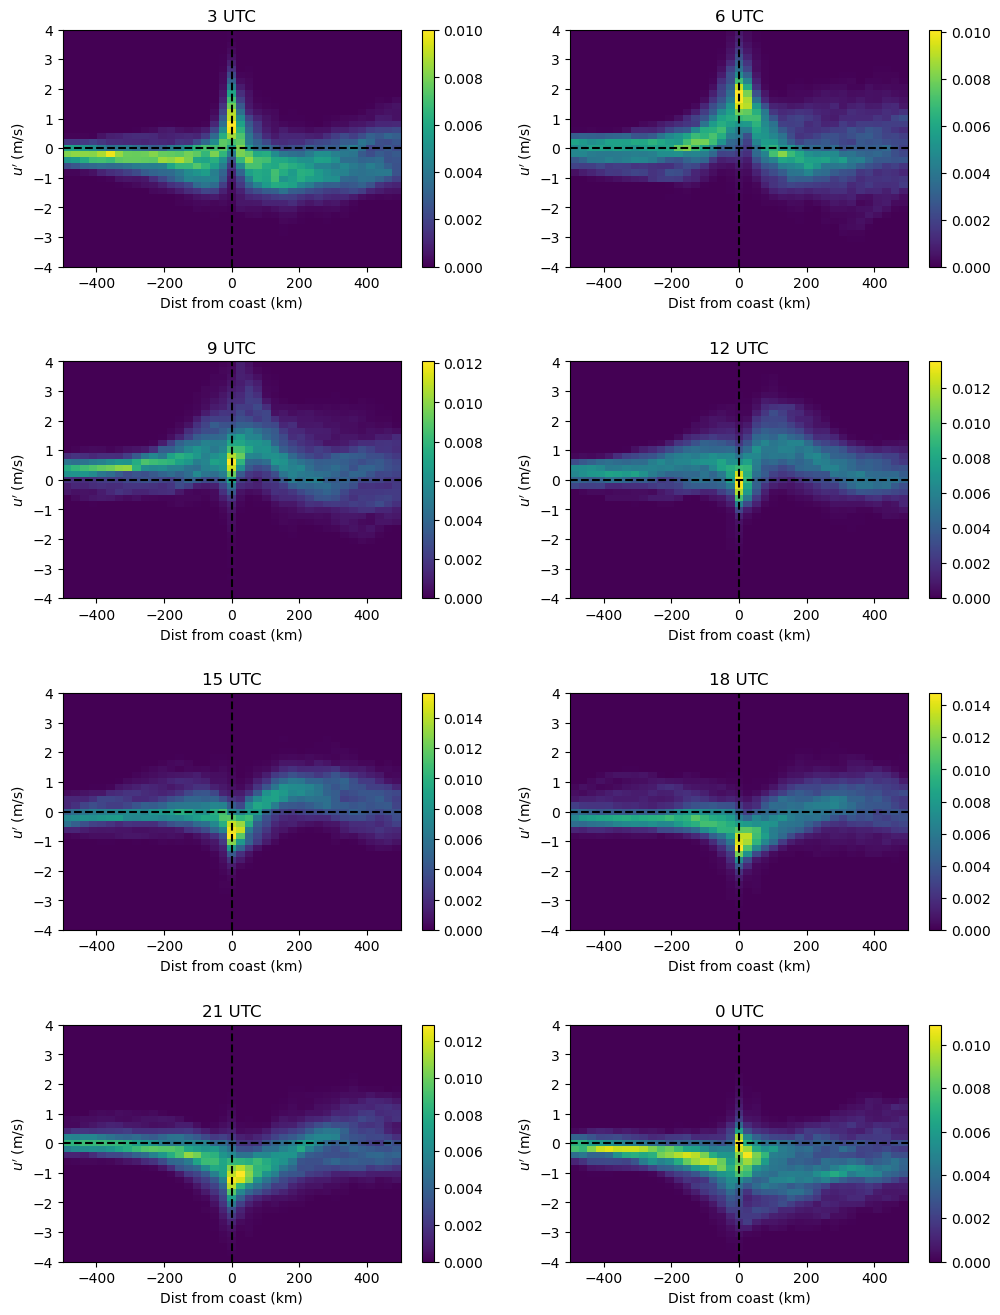

In [101]:
def plot(min_coast_dist,hourly_pert,variance,lsm,h,ax):

    hourly_flat = hourly_pert.sel(hour=h).values.flatten()
    coast_flat = min_coast_dist.values.flatten()
    variance_flat = variance.values.flatten()

    lsm_flat = lsm.values.flatten()
    lsm_flat = lsm_flat[variance_flat<0.5]
    w = np.where(lsm_flat==1,lsm_flat.sum(),lsm_flat.shape[0]-lsm_flat.sum())
    
    plt.hist2d(
        coast_flat[variance_flat<0.5],
        hourly_flat[variance_flat<0.5],
        weights=1/w,
        bins=[np.linspace(-500,500,40),np.linspace(-4,4,40)],cmap="viridis");
    ax.axhline(ls="--",color="k") 
    ax.axvline(ls="--",color="k") 
    plt.xlabel("Dist from coast (km)")
    plt.ylabel("$u'$ (m/s)")
    plt.title(str(h) + " UTC")
    plt.colorbar()

plt.figure(figsize=[12,16])

ax=plt.subplot(4,2,1)
plot(min_coast_dist,hourly_pert,angle_ds.variance_interp,lsm,3,ax)

ax=plt.subplot(4,2,2)
plot(min_coast_dist,hourly_pert,angle_ds.variance_interp,lsm,6,ax)

ax=plt.subplot(4,2,3)
plot(min_coast_dist,hourly_pert,angle_ds.variance_interp,lsm,9,ax)

ax=plt.subplot(4,2,4)
plot(min_coast_dist,hourly_pert,angle_ds.variance_interp,lsm,12,ax)

ax=plt.subplot(4,2,5)
plot(min_coast_dist,hourly_pert,angle_ds.variance_interp,lsm,15,ax)

ax=plt.subplot(4,2,6)
plot(min_coast_dist,hourly_pert,angle_ds.variance_interp,lsm,18,ax)

ax=plt.subplot(4,2,7)
plot(min_coast_dist,hourly_pert,angle_ds.variance_interp,lsm,21,ax)

ax=plt.subplot(4,2,8)
plot(min_coast_dist,hourly_pert,angle_ds.variance_interp,lsm,0,ax)

plt.subplots_adjust(hspace=0.4)

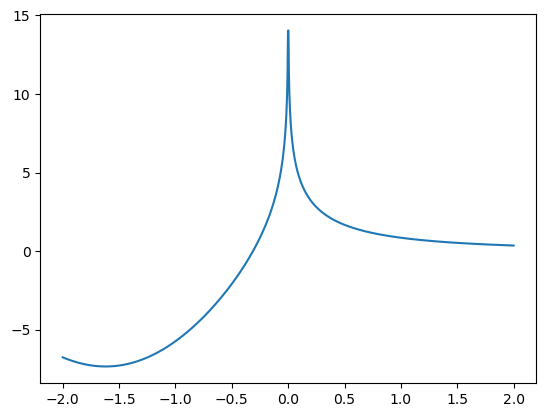

In [31]:
beta = 7.26*10**-3
A = 7**3
tao = np.pi / 2
x = np.linspace(-2,2,1000)

import scipy
si, ci = scipy.special.sici(x)

plt.plot(x,np.squeeze(beta * A * np.sin(tao) * ( ( -ci * np.cos(x) ) + ( ((0.5*np.pi - si) * np.sin(x) )) ) ))

In [150]:
y = xr.open_dataset(
    "/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_uas_vas_201601010000_201601312300.nc"
    ).vprime_pert.sel(lat=-20,lon=120,method="nearest")
x = np.arange(0,24)

In [3]:
from scipy.optimize import curve_fit

def fit_amplitude(ds):
    
    def daily_cycle(t, A, phi):
        return A * np.cos(2 * np.pi * t / 24 + phi)

    popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])
    
    return np.abs(popt_sample[0])


ds = xr.open_dataset(
    "/g/data/ng72/ab4502/hourly_composites/barra_c/barra_c_hourly_perturbation_uas_vas_201601010000_201601312300.nc",
    chunks={"lat":200,"lon":200}).vprime_pert

test_out = xr.apply_ufunc(
    fit_amplitude,
    ds,
    input_core_dims = [["hour"]],
    dask="parallelized",
    vectorize=True).compute()

/jobfs/141993829.gadi-pbs/ipykernel_4158446/3554497865.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])


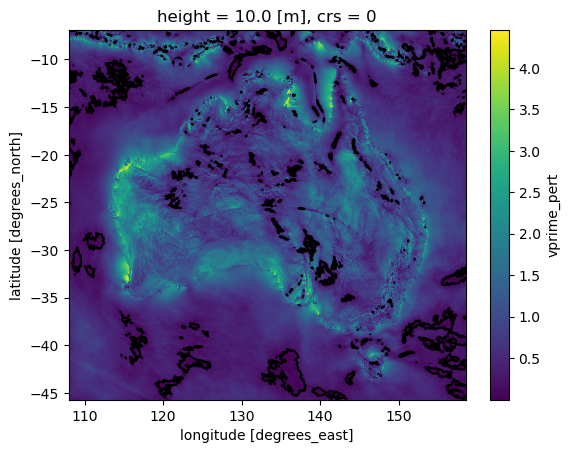

In [27]:
test_out.plot()
xx,yy=np.meshgrid(ds.lon,ds.lat)
plt.contour(xx,yy,(1-stats.t.cdf(np.abs(t_stat), df=22)),levels=[0.05],colors="k")

In [5]:
from scipy.optimize import curve_fit

def fit_amplitude(ds):
    
    def daily_cycle(t, A, phi):
        return A * np.cos(2 * np.pi * t / 24 + phi)

    popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])
    
    return pcov2_sample[0,0]


test_cov = xr.apply_ufunc(
    fit_amplitude,
    ds,
    input_core_dims = [["hour"]],
    dask="parallelized",
    vectorize=True).compute()

/jobfs/141993829.gadi-pbs/ipykernel_4158446/3989137879.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])


In [9]:
t_stat = (test_out / np.sqrt(test_cov))

import scipy.stats as stats

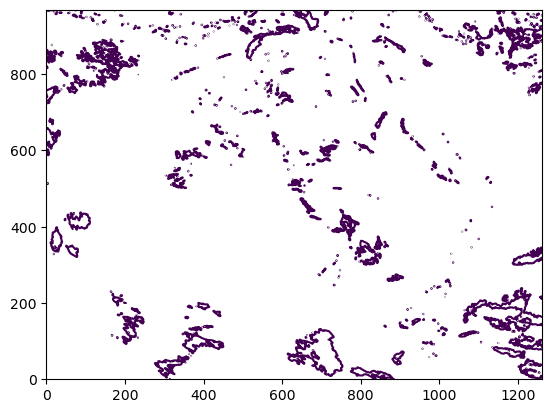

In [ ]:
test95 = xr.concat([xr.apply_ufunc(
    fit_amplitude,
    ds.isel(hour=np.random.randint(0,24,24)),
    input_core_dims = [["hour"]],
    dask="parallelized",
    vectorize=True) for N in range(100)],dim="test").chunk({"test":-1}).quantile(.95,dim="test").compute()

/jobfs/141993829.gadi-pbs/ipykernel_4153115/3554497865.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])
/jobfs/141993829.gadi-pbs/ipykernel_4153115/3554497865.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])
/jobfs/141993829.gadi-pbs/ipykernel_4153115/3554497865.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])
/jobfs/141993829.gadi-pbs/ipykernel_4153115/3554497865.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sample, pcov2_sample = curve_fit(daily_cycle, np.arange(0,24), ds, p0=[1, 0])
/jobfs/141993829.gadi-pbs/ipykernel_4153115/3554497865.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_sam

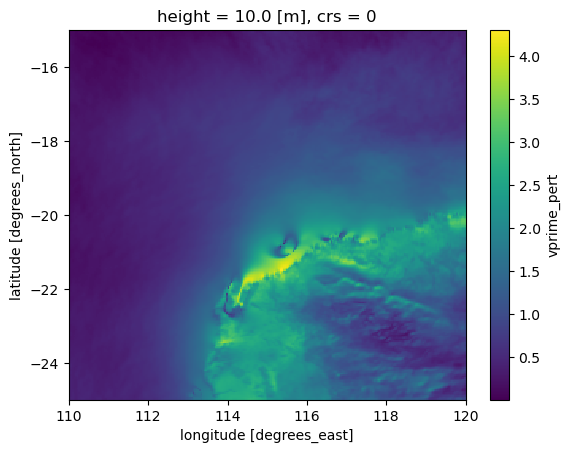

In [20]:
test_out.plot()

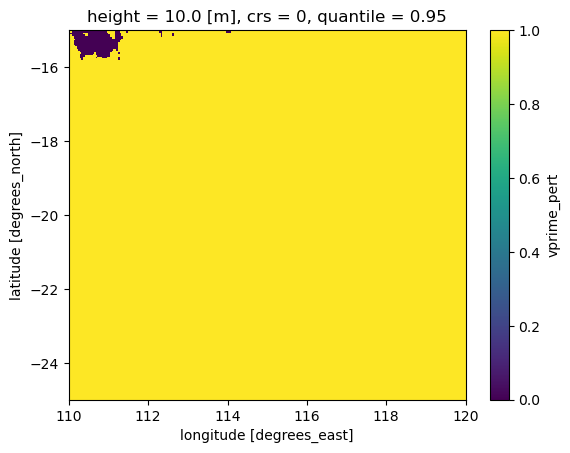

In [22]:
(test_out > test95).plot()

In [ ]:
sample_out

In [151]:
from scipy.optimize import curve_fit

def sig_test():

def daily_cycle(t, A, phi):
    return A * np.cos(2 * np.pi * t / 24 + phi)




-0.2958988553828102


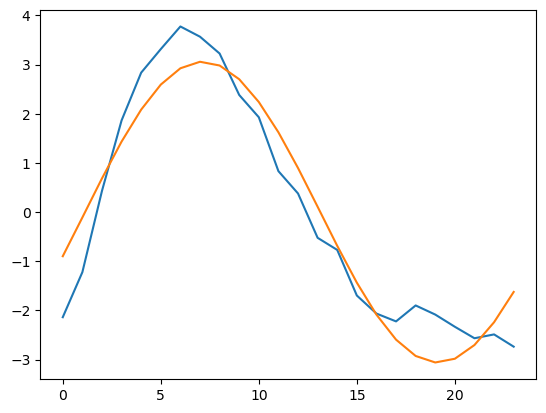

In [152]:
popt_sample, pcov2_sample = curve_fit(daily_cycle, x, y.values, p0=[1, 0])
plt.plot(x,y)
plt.plot(x,daily_cycle(x,popt_sample[0],popt_sample[1]))

print(popt[0])

In [153]:
test_dist = []
for N in range(1000):
    ytest = y[np.random.randint(0,len(x),size=len(x))]
    popt, pcov2 = curve_fit(daily_cycle, x, ytest.values, p0=[1, 0])
    test_dist.append(np.abs(popt[0]))


0.0

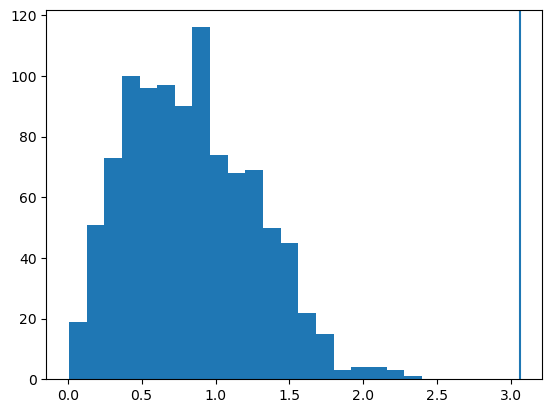

In [154]:
plt.hist(test_dist,bins=20)
plt.gca().axvline(popt_sample[0])

(np.array(test_dist)>np.abs(popt_sample[0])).sum() / len(test_dist)